In [1]:
import pandas as pd 
import numpy as np

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

import seaborn as sns
from matplotlib import pyplot as plt


## Etape 1 : Réalisation d'un dataset

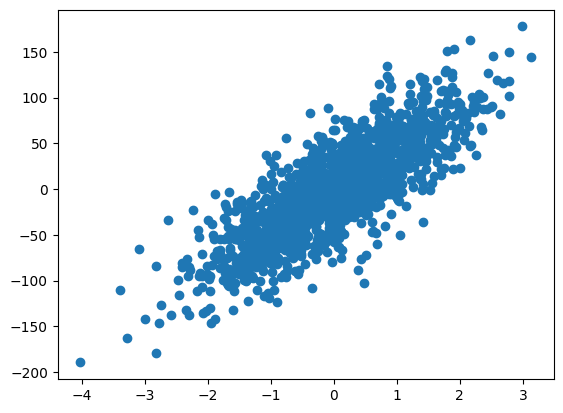

In [53]:
x, y = make_regression (n_samples=1500, n_features=1, noise=30) #génére un problème de régression
plt.scatter(x,y) #on créé un graphe

In [54]:
#on vérifie la validité des données
print(x.shape)
print(y.shape)

print(x, y)
#le y.shape n'est pas à la bonne dimension
y=y.reshape(y.shape[0], 1)
print(y.shape)


(1500, 1)
(1500,)
[[-0.23800123]
 [-1.56733949]
 [ 1.33094377]
 ...
 [-0.04534715]
 [-1.24089686]
 [-0.89738472]] [-33.72187669 -44.26494609  76.29246941 ...  14.49185348 -81.08058364
 -81.59565647]
(1500, 1)


In [55]:
#on créé une matrice de dataset contenant la colonne x et une autre colonne de 1
X=np.hstack((x, np.ones (x.shape)))
print(X)
print(X.shape)

[[-0.23800123  1.        ]
 [-1.56733949  1.        ]
 [ 1.33094377  1.        ]
 ...
 [-0.04534715  1.        ]
 [-1.24089686  1.        ]
 [-0.89738472  1.        ]]
(1500, 2)


In [56]:
#on initialise les paramètres a et b de la regression lineaire
theta=np.random.randn(2,1)
print(theta)
print(theta.shape)

[[-0.13350494]
 [ 0.98526433]]
(2, 1)


# Etape 2 : Définition de modèle et son affichage

In [57]:
#on définit le modèle régression linéaire, multiplication de matrices
def model (X, theta):
    return X.dot(theta)

In [58]:
modele = model(X, theta) 
print(modele)
print(modele.shape)

[[1.01703867]
 [1.1945119 ]
 [0.80757676]
 ...
 [0.9913184 ]
 [1.1509302 ]
 [1.10506963]]
(1500, 1)


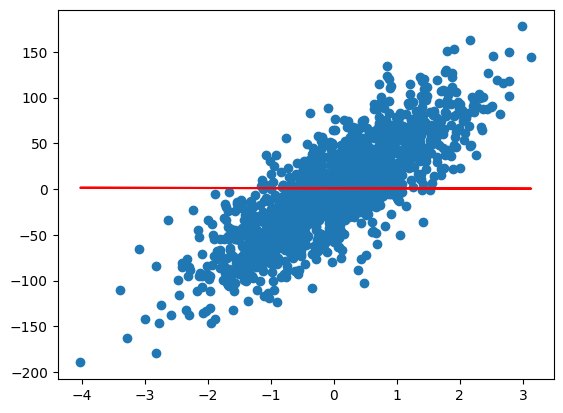

In [59]:
plt.scatter(x,y)
plt.plot(x, model(X,theta), c='r')
#on voit que le modèle ne répond pas à nos attentes

In [60]:
def cout(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [61]:
cout = cout(X, y, theta)
print(cout.shape)

()


# Quatrième étape : Algorithme de descente de gradient

In [62]:
#on crée une fonction descente_gradiant pour réduire la fonction cout
def grad(X, y, theta):
    m=len(y)
    return (1/m)*X.T.dot(model(X,theta)-y)

def DG (X,y, theta, learning_rate, n_iterations):
    for i in range(0, n_iterations):
        theta=theta-learning_rate*grad(X,y, theta)
    return theta

In [67]:
#on teste la descente des gradiants sur notre modèle 
thetaF = DG(X, y, theta, 0.5, 1000)
print(thetaF)

[[41.47179817]
 [-0.88136793]]


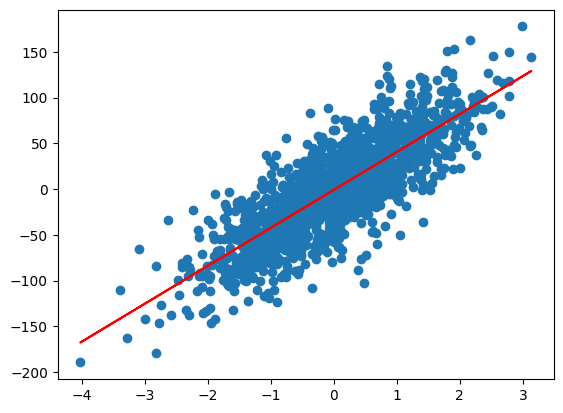

In [68]:
prediction=model(X, thetaF)
plt.scatter(x,y)
plt.plot(x, prediction, c='r')

In [69]:
def DG (X,y, theta, learning_rate, n_iterations):
    histCout=np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta=theta-learning_rate*grad(X,y, theta)
        histCout[i]= cout(X,y,theta)
    return theta, histCout

In [70]:
thetaF, histCout=DG(X,y, theta, learning_rate =0.01, n_iterations=1000)
thetaF, histCout

TypeError: 'numpy.float64' object is not callable

In [25]:
plt.plot(range(1000),histCout)

NameError: name 'histCout' is not defined

In [ ]:
def coefDet(y, prediction):
    u=((y-prediction)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

In [ ]:
print(coefDet(y, prediction))